In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import csv # implements classes to read and write tabular data in CSV form
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

import folium # map rendering library

# import the library to open URLs
import urllib.request

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/marcus/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_0         148 KB  conda-forge
    conda-4.7.5                |           py36_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2019.5.15-0 --> conda-forge::ca-certificates-2019.6.16-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  conda                                           pkgs/main --> conda-forge



certifi-2019.6.16    | 148 KB    | ################

Load and explore the data (see also London_Neigborhoods)

In [3]:
## Read the CSV data file into a pandas DataFrame

LGeo=pd.read_csv('LONDON.csv')
print('Data uploaded!')

Data uploaded!


In [4]:
LGeo.head()

,Neighborhood,Borough,Postcode,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",SE2,51.492450,0.121270
1,Acton,"Ealing, Hammersmith and Fulham","W3, W4",51.513240,-0.267460
2,Aldgate,City,EC3,51.513304,-0.077771
3,Aldwych,Westminster,WC2,51.513291,-0.117093
4,Anerley,Bromley,SE20,51.412330,-0.065390


In [5]:
LGeo.shape

(309, 5)

In [6]:
address = 'London City, UK'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of London are 51.5118606, -0.0780174.


In [7]:
# create map of Toronto using latitude and longitude values
map_BM = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(LGeo['Latitude'], LGeo['Longitude'], LGeo['Borough'], LGeo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BM)  
    
map_BM

In [1]:


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


NameError: name 'CLIENT_ID' is not defined

In [10]:
LGeo.loc[0, 'Neighborhood']

'Abbey Wood'

In [12]:
neighborhood_latitude = LGeo.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = LGeo.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = LGeo.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Abbey Wood are 51.492450000000076, 0.12127000000003818.


In [14]:
# get the top 100 venues that are within a radius of 500 meters - through a GET url
# send this request to the Foursquare API to search and explore the neighborhood to get the venues

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=HAN2IQHZB3WORXRCCD4NCIL1QOXBXQMLEBAQ01DY4WFCGVD4&client_secret=RXQ0DWEOZNSWGC3GOATTJ3FONYXQGD3IP1CCS0L4GVBZQPFB&v=20181218&ll=51.492450000000076,0.12127000000003818&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d188950018cbb002c452c13'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bexley',
  'headerFullLocation': 'Bexley, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 51.49695000450008,
    'lng': 0.12848406099271456},
   'sw': {'lat': 51.487949995500074, 'lng': 0.1140559390073618}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55bb5956498e05559fb4e8c3',
       'name': "Sainsbury's",
       'location': {'address': 'Harrow Mannor Way',
        'lat': 51.492824108986454,
        'lng': 0.12072390863674594,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.49282410

In [16]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
# get the json format results from the GET request URL of Foursquare API
# structure the data into a dataframe which contains the Venue name, Venue category and lat and long

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sainsbury's,Supermarket,51.492824,0.120724
1,Lesnes Abbey,Historic Site,51.489526,0.125839
2,Lidl,Supermarket,51.496152,0.118417
3,Abbey Wood Railway Station (ABW),Train Station,51.490825,0.123432
4,Costcutter,Convenience Store,51.491287,0.120938


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [22]:
# Create a function, which takes all the neighborhoods names, their geo-coordinates data and returns
# all the venues of each neighborhood and also their lat and long data along with the venue categories
# Extract Venues data for each neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# Run the above function on each neighborhood and create a new dataframe called LGeo_venues.

LGeo_venues = getNearbyVenues(names=LGeo['Neighborhood'],
                                   latitudes=LGeo['Latitude'],
                                   longitudes=LGeo['Longitude']
                                  )

Abbey Wood
Acton
Aldgate
Aldwych
Anerley
Angel
Archway
Arkley
Arnos Grove
Balham
Bankside
Barbican
Barnes
Barnet Gate
Barnsbury
Battersea
Bayswater
Beckenham
Beckton
Bedford Park
Belgravia
Bellingham
Belsize Park
Bermondsey
Bethnal Green
Bexleyheath
Blackfriars
Blackheath
Blackheath Royal Standard
Blackwall
Bloomsbury
Bounds Green
Bow
Bowes Park
Brent Cross
Brent Park
Brixton
Brockley
Bromley
Brompton
Brondesbury
Brunswick Park
Burroughs, The
Camberwell
Cambridge Heath
Camden Town
Canary Wharf
Cann Hall
Canning Town
Canonbury
Castelnau
Catford
Chalk Farm
Charing Cross
Charlton
Chelsea
Childs Hill
Chinatown
Chinbrook
Chingford
Chiswick
Church End
Church End
Clapham
Clerkenwell
Colindale
Colliers Wood
Colney Hatch
Covent Garden
Cricklewood
Crofton Park
Crossness
Crouch End
Crystal Palace
Cubitt Town
Custom House
Dalston
Dartford
De Beauvoir Town
Denmark Hill
Deptford
Dollis Hill
Dulwich
Ealing
Earls Court
Earlsfield
East Dulwich
East Finchley
East Ham
East Sheen
Edmonton
Elephant and Cas

In [27]:
print(LGeo_venues.shape)
LGeo_venues.head()

(10288, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,51.49245,0.12127,Sainsbury's,51.492824,0.120724,Supermarket
1,Abbey Wood,51.49245,0.12127,Lesnes Abbey,51.489526,0.125839,Historic Site
2,Abbey Wood,51.49245,0.12127,Lidl,51.496152,0.118417,Supermarket
3,Abbey Wood,51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
4,Abbey Wood,51.49245,0.12127,Costcutter,51.491287,0.120938,Convenience Store


In [29]:
#LGeo_venues.groupby('Venue Category').size()

LGeo_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)

Venue Category
Pub                                         690
Coffee Shop                                 664
Café                                        571
Hotel                                       370
Grocery Store                               318
Italian Restaurant                          313
Pizza Place                                 216
Park                                        210
Indian Restaurant                           203
Bakery                                      183
Sandwich Place                              172
Restaurant                                  172
Gym / Fitness Center                        167
Bar                                         152
Bus Stop                                    132
Fast Food Restaurant                        132
Supermarket                                 126
Burger Joint                                126
Clothing Store                              124
Turkish Restaurant                          115
Cocktail Bar             

In [24]:
dfH1 = LGeo_venues.groupby('Venue Category').size().reset_index(name='count')
dfH = dfH1.sort_values('count',ascending = False).head(10)

In [25]:
import random

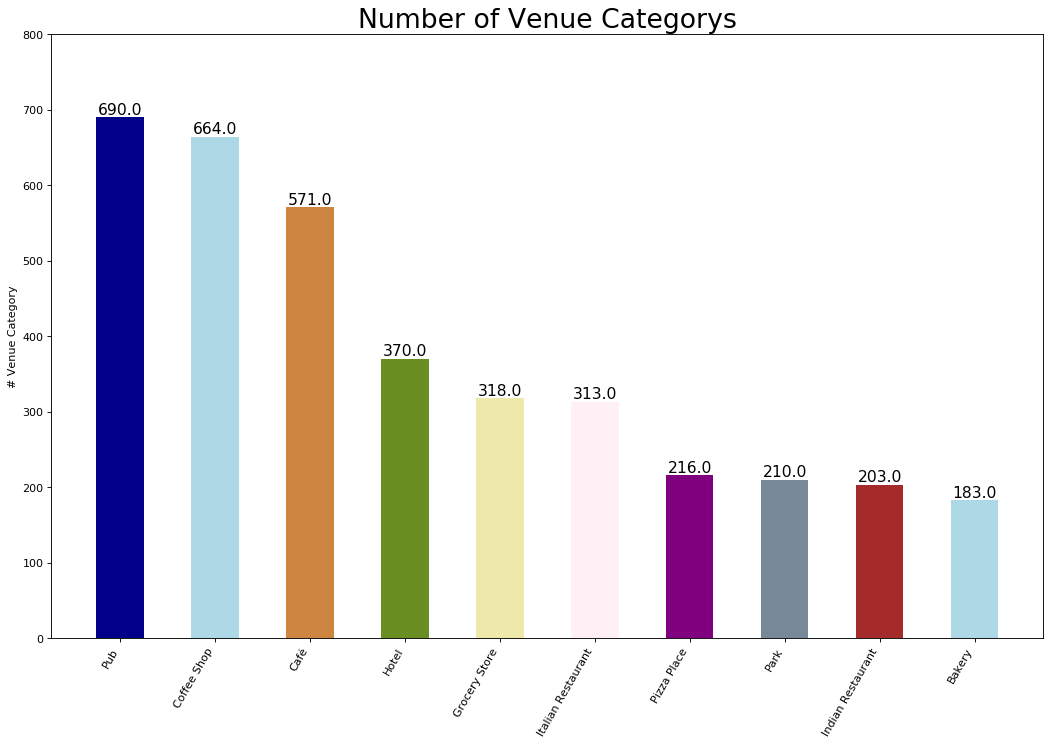

In [26]:
random.seed(100)
n = dfH['Venue Category'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(dfH['Venue Category'], dfH['count'], color=c, width=.5)
for i, val in enumerate(dfH['count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

# Decoration
plt.gca().set_xticklabels(dfH['Venue Category'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Venue Categorys", fontsize=24)
plt.ylabel('# Venue Category')
plt.ylim(0, 800)
plt.show()

In [30]:
LGeo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,6,6,6,6,6,6
Acton,7,7,7,7,7,7
Aldgate,96,96,96,96,96,96
Aldwych,100,100,100,100,100,100
Anerley,5,5,5,5,5,5
Angel,25,25,25,25,25,25
Archway,31,31,31,31,31,31
Arkley,14,14,14,14,14,14
Arnos Grove,7,7,7,7,7,7


In [31]:
print('There are {} uniques categories.'.format(len(LGeo_venues['Venue Category'].unique())))

There are 385 uniques categories.


In [32]:
# Using One Hot encoding on the above dataframe, create another dataframe and then group all 
# the neighborhoods based on the frequency of occurrence of each venue category
# One-hot encoding is necessary to include categorical variables in a model. A machine learning algorithm
# cannot understand a building type of “office”, so we have to record it as a 1 or 0 

LGeo_onehot = pd.get_dummies(LGeo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LGeo_onehot['Neighborhood'] = LGeo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LGeo_onehot.columns[-1]] + list(LGeo_onehot.columns[:-1])
LGeo_onehot = LGeo_onehot[fixed_columns]

LGeo_onehot.head(20)

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Po

In [33]:
LGeo_onehot.shape

(10288, 385)

In [34]:
LGeo_grouped = LGeo_onehot.groupby('Neighborhood').mean().reset_index()
LGeo_grouped.head(5)

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Po

In [35]:
num_top_venues = 5

for hood in LGeo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LGeo_grouped[LGeo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Wood----
               venue  freq
0        Supermarket  0.33
1      Historic Site  0.17
2  Convenience Store  0.17
3        Coffee Shop  0.17
4      Train Station  0.17


----Acton----
               venue  freq
0      Grocery Store  0.14
1     Breakfast Spot  0.14
2        Gas Station  0.14
3  Convenience Store  0.14
4  Indian Restaurant  0.14


----Aldgate----
          venue  freq
0         Hotel  0.10
1   Coffee Shop  0.09
2  Cocktail Bar  0.06
3   Salad Place  0.04
4    Restaurant  0.03


----Aldwych----
          venue  freq
0       Theater  0.09
1   Coffee Shop  0.06
2    Restaurant  0.05
3         Hotel  0.04
4  Dessert Shop  0.04


----Anerley----
            venue  freq
0            Park   0.2
1  Hardware Store   0.2
2     Gas Station   0.2
3             Pub   0.2
4     Music Store   0.2


----Angel----
            venue  freq
0             Pub  0.20
1            Park  0.12
2     Coffee Shop  0.08
3   Grocery Store  0.08
4  Breakfast Spot  0.08


----Archway----
 

                        venue  freq
0                         Pub  0.13
1                    Bus Stop  0.13
2                        Café  0.09
3          Spanish Restaurant  0.04
4  Modern European Restaurant  0.04


----Castelnau----
               venue  freq
0                Pub  0.43
1  French Restaurant  0.29
2               Lake  0.14
3               Café  0.14
4        Zoo Exhibit  0.00


----Catford----
                    venue  freq
0  Furniture / Home Store  0.25
1          Discount Store  0.25
2      Turkish Restaurant  0.25
3           Train Station  0.25
4             Outdoor Gym  0.00


----Chalk Farm----
                venue  freq
0                Café  0.10
1                 Bar  0.08
2                 Pub  0.05
3  Italian Restaurant  0.05
4         Pizza Place  0.05


----Charing Cross----
          venue  freq
0       Theater  0.07
1         Hotel  0.06
2   Coffee Shop  0.04
3  Dessert Shop  0.04
4      Wine Bar  0.03


----Charlton----
               venue  freq
0

               venue  freq
0               Café  0.09
1  Convenience Store  0.09
2              Trail  0.09
3              Hotel  0.09
4          Reservoir  0.05


----Finsbury Park----
               venue  freq
0              Hotel  0.21
1        Pizza Place  0.08
2  Fish & Chips Shop  0.08
3               Café  0.08
4           Bus Stop  0.08


----Fitzrovia----
              venue  freq
0       Coffee Shop  0.12
1             Hotel  0.04
2  Tapas Restaurant  0.04
3       Pizza Place  0.04
4            Bakery  0.04


----Forest Gate----
              venue  freq
0  Asian Restaurant   0.2
1    Ice Cream Shop   0.1
2          Bus Stop   0.1
3             Hotel   0.1
4              Café   0.1


----Forest Hill----
         venue  freq
0          Pub  0.17
1         Café  0.11
2          Bar  0.06
3  Coffee Shop  0.06
4     Bus Stop  0.06


----Fortis Green----
               venue  freq
0        Coffee Shop  0.14
1  Indian Restaurant  0.09
2               Café  0.09
3         Shoe Stor

                        venue  freq
0                        Café  0.12
1          Italian Restaurant  0.08
2                      Bakery  0.04
3  Modern European Restaurant  0.04
4                Burger Joint  0.04


----Kentish Town----
                venue  freq
0  Italian Restaurant  0.10
1                 Pub  0.10
2                Café  0.06
3         Music Venue  0.06
4         Coffee Shop  0.06


----Kidbrooke----
                     venue  freq
0  Health & Beauty Service   0.2
1             Soccer Field   0.2
2     Gym / Fitness Center   0.2
3              Coffee Shop   0.2
4            Grocery Store   0.2


----Kilburn----
                  venue  freq
0     Indian Restaurant  0.12
1                   Pub  0.09
2           Supermarket  0.06
3  Brazilian Restaurant  0.06
4  Fast Food Restaurant  0.06


----King's Cross----
          venue  freq
0         Hotel  0.08
1   Coffee Shop  0.08
2           Pub  0.06
3          Café  0.05
4  Burger Joint  0.04


----Kingsbury----
  

                  venue  freq
0           Coffee Shop  0.13
1           Supermarket  0.07
2  Fast Food Restaurant  0.07
3             Bookstore  0.07
4      Sushi Restaurant  0.03


----North Kensington----
                venue  freq
0                Café  0.12
1  Italian Restaurant  0.08
2               Hotel  0.06
3             Exhibit  0.05
4      Science Museum  0.04


----North Woolwich----
                venue  freq
0              Bridge   0.1
1  Light Rail Station   0.1
2     Harbor / Marina   0.1
3               Hotel   0.1
4       Boat or Ferry   0.1


----Notting Hill----
                venue  freq
0  Italian Restaurant  0.11
1         Coffee Shop  0.08
2                 Pub  0.07
3              Bakery  0.04
4                Café  0.04


----Nunhead----
               venue  freq
0               Café  0.18
1  Convenience Store  0.18
2        Pizza Place  0.09
3        Coffee Shop  0.09
4                Pub  0.09


----Oakleigh Park----
                venue  freq
0        

               venue  freq
0               Park  0.25
1                Pub  0.25
2        Coffee Shop  0.25
3         Restaurant  0.25
4  Outdoor Sculpture  0.00


----Southgate----
                  venue  freq
0  Fast Food Restaurant  0.12
1           Coffee Shop  0.08
2           Pizza Place  0.08
3  Gym / Fitness Center  0.08
4                  Café  0.08


----Spitalfields----
               venue  freq
0        Coffee Shop  0.08
1     Clothing Store  0.04
2                Pub  0.04
3  Indian Restaurant  0.04
4    Thai Restaurant  0.03


----St Giles----
         venue  freq
0         Café  0.09
1  Coffee Shop  0.06
2    Gastropub  0.06
3     Bus Stop  0.06
4         Park  0.06


----St James's----
            venue  freq
0         Theater  0.06
1           Hotel  0.05
2     Art Gallery  0.04
3          Lounge  0.04
4  Ice Cream Shop  0.03


----St John's Wood----
            venue  freq
0   Deli / Bodega  0.07
1     Coffee Shop  0.07
2            Café  0.07
3  Ice Cream Shop  0.0

               venue  freq
0          Pet Store  0.25
1  Convenience Store  0.25
2                Gym  0.25
3  Indian Restaurant  0.25
4        Zoo Exhibit  0.00


----West Brompton----
           venue  freq
0          Hotel  0.24
1            Pub  0.12
2  Grocery Store  0.12
3         Garden  0.06
4  Indie Theater  0.06


----West Ealing----
                venue  freq
0       Grocery Store  0.10
1  Persian Restaurant  0.07
2               Hotel  0.07
3         Coffee Shop  0.07
4   Indian Restaurant  0.07


----West Green----
                venue  freq
0                Café  0.20
1  Turkish Restaurant  0.15
2              Lounge  0.10
3       Grocery Store  0.05
4   Polish Restaurant  0.05


----West Hackney----
                venue  freq
0                Café  0.07
1                 Pub  0.07
2         Coffee Shop  0.05
3  Turkish Restaurant  0.05
4       Grocery Store  0.05


----West Ham----
           venue  freq
0           Park   0.2
1  Metro Station   0.2
2       Platform  

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LGeo_grouped['Neighborhood']

for ind in np.arange(LGeo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LGeo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Supermarket,Coffee Shop,Convenience Store,Historic Site,Train Station,Forest,Food Truck,Ethiopian Restaurant,Event Space,Exhibit
1,Acton,Breakfast Spot,Indian Restaurant,Grocery Store,Park,Gas Station,Train Station,Convenience Store,Food Stand,Film Studio,Event Space
2,Aldgate,Hotel,Coffee Shop,Cocktail Bar,Salad Place,Restaurant,Gym / Fitness Center,Asian Restaurant,Pizza Place,Pub,Hotel Bar
3,Aldwych,Theater,Coffee Shop,Restaurant,Hotel,Dessert Shop,Cocktail Bar,Pub,History Museum,Burger Joint,Italian Restaurant
4,Anerley,Hardware Store,Gas Station,Pub,Music Store,Park,Fish & Chips Shop,Event Space,Exhibit,Falafel Restaurant,Farm


In [39]:
# determine the optimal value of K for dataset using the Silhouette Coefficient Method

L_grouped_clustering = LGeo_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(L_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(L_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.16298240547314097
For n_clusters=3, The Silhouette Coefficient is 0.10406519487291023
For n_clusters=4, The Silhouette Coefficient is 0.10811257833771752
For n_clusters=5, The Silhouette Coefficient is 0.12033284442183052
For n_clusters=6, The Silhouette Coefficient is 0.011286888354966997
For n_clusters=7, The Silhouette Coefficient is 0.011707427557378289
For n_clusters=8, The Silhouette Coefficient is 0.015135853339281677
For n_clusters=9, The Silhouette Coefficient is 0.003996208706922669


##### n_clusters=5 has highest Silhouette Coefficient. 


In [40]:
# set number of clusters
kclusters = 5

LGeo_grouped_clustering = LGeo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LGeo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 0, 3, 3, 2, 2, 0, 2], dtype=int32)

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LGeo_merged = LGeo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
LGeo_merged = LGeo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

LGeo_merged.head() # check the last column

,Neighborhood,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich",SE2,51.492450,0.121270,2,Supermarket,Coffee Shop,Convenience Store,Historic Site,Train Station,Forest,Food Truck,Ethiopian Restaurant,Event Space,Exhibit
1,Acton,"Ealing, Hammersmith and Fulham","W3, W4",51.513240,-0.267460,2,Breakfast Spot,Indian Restaurant,Grocery Store,Park,Gas Station,Train Station,Convenience Store,Food Stand,Film Studio,Event Space
2,Aldgate,City,EC3,51.513304,-0.077771,0,Hotel,Coffee Shop,Cocktail Bar,Salad Place,Restaurant,Gym / Fitness Center,Asian Restaurant,Pizza Place,Pub,Hotel Bar
3,Aldwych,Westminster,WC2,51.513291,-0.117093,0,Theater,Coffee Shop,Restaurant,Hotel,Dessert Shop,Cocktail Bar,Pub,History Museum,Burger Joint,Italian Restaurant
4,Anerley,Bromley,SE20,51.412330,-0.065390,3,Hardware Store,Gas Station,Pub,Music Store,Park,Fish & Chips Shop,Event Space,Exhibit,Falafel Restaurant,Farm


In [43]:
LGeo_merged.to_csv('LGeom.csv',index=False)

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LGeo_merged['Latitude'], LGeo_merged['Longitude'], LGeo_merged['Neighborhood'], LGeo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
LGeo_merged.loc[LGeo_merged['Cluster Labels'] == 0, LGeo_merged.columns[[0] + list(range(5, LGeo_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Aldgate,0,Hotel,Coffee Shop,Cocktail Bar,Salad Place,Restaurant,Gym / Fitness Center,Asian Restaurant,Pizza Place,Pub,Hotel Bar
3,Aldwych,0,Theater,Coffee Shop,Restaurant,Hotel,Dessert Shop,Cocktail Bar,Pub,History Museum,Burger Joint,Italian Restaurant
8,Arnos Grove,0,Cricket Ground,Construction & Landscaping,Bus Stop,Fish & Chips Shop,Hotel,Pub,French Restaurant,Dance Studio,Flea Market,Falafel Restaurant
16,Bayswater,0,Hotel,Chinese Restaurant,Pub,Greek Restaurant,Coffee Shop,French Restaurant,Burger Joint,Boat or Ferry,Sandwich Place,Pharmacy
20,Belgravia,0,Hotel,Italian Restaurant,Café,Restaurant,Mediterranean Restaurant,Plaza,Gastropub,Bakery,Park,Grocery Store
29,Blackwall,0,Italian Restaurant,Hotel,Coffee Shop,Convenience Store,Sandwich Place,Café,Grocery Store,Gym / Fitness Center,Steakhouse,Ice Cream Shop
39,Brompton,0,Hotel,Pub,Café,Chinese Restaurant,Garden,Tapas Restaurant,Grocery Store,Historic Site,Burger Joint,French Restaurant
48,Canning Town,0,Hotel,Tennis Court,Chinese Restaurant,Burger Joint,Park,Tapas Restaurant,Arts & Crafts Store,Exhibit,Falafel Restaurant,Farm
53,Charing Cross,0,Theater,Hotel,Coffee Shop,Dessert Shop,Steakhouse,Café,Wine Bar,French Restaurant,Ice Cream Shop,Pub
55,Chelsea,0,Hotel,Italian Restaurant,Café,Pub,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,English Restaurant,Art Gallery,Clothing Store


In [45]:
LGeo_merged.loc[LGeo_merged['Cluster Labels'] == 1, LGeo_merged.columns[[1] + list(range(5, LGeo_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Lewisham,1,Bus Stop,Brewery,Bus Station,Metro Station,Park,Fish & Chips Shop,Train Station,Food Court,Food & Drink Shop,French Restaurant
47,Waltham Forest,1,Restaurant,Bar,Wine Bar,Beer Garden,Park,Fish & Chips Shop,Dessert Shop,Convenience Store,Food Stand,Exhibit
59,Waltham Forest,1,Gym,English Restaurant,American Restaurant,Pizza Place,Gym / Fitness Center,Film Studio,Event Space,Exhibit,Falafel Restaurant,Farm
69,"Barnet, Brent, Camden",1,Supermarket,Construction & Landscaping,Pizza Place,Home Service,Park,Zoo,Film Studio,Event Space,Exhibit,Falafel Restaurant
93,"Bexley, Greenwich",1,Bus Stop,Trail,Platform,English Restaurant,Other Repair Shop,Train Station,Café,Event Space,Exhibit,Falafel Restaurant
116,Hackney,1,Athletics & Sports,Bike Rental / Bike Share,Forest,Bus Stop,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
137,"Greenwich, Lewisham",1,Track,Soccer Field,Rugby Pitch,Park,Zoo,Film Studio,Event Space,Exhibit,Falafel Restaurant,Farm
140,Barnet,1,Bus Stop,Costume Shop,Hotel,Supermarket,Gas Station,Park,Pet Store,Auto Workshop,Coffee Shop,Hookah Bar
157,Lewisham,1,Convenience Store,Nature Preserve,Gym,Zoo,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
163,Newham,1,Restaurant,Gas Station,Fried Chicken Joint,Fish & Chips Shop,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market


In [46]:
LGeo_merged.loc[LGeo_merged['Cluster Labels'] == 2, LGeo_merged.columns[[1] + list(range(5, LGeo_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bexley, Greenwich",2,Supermarket,Coffee Shop,Convenience Store,Historic Site,Train Station,Forest,Food Truck,Ethiopian Restaurant,Event Space,Exhibit
1,"Ealing, Hammersmith and Fulham",2,Breakfast Spot,Indian Restaurant,Grocery Store,Park,Gas Station,Train Station,Convenience Store,Food Stand,Film Studio,Event Space
6,Islington,2,Coffee Shop,Grocery Store,Pub,Italian Restaurant,Bar,Pizza Place,Gastropub,Farmers Market,Turkish Restaurant,Sandwich Place
7,Barnet,2,Grocery Store,Supermarket,Café,Gym / Fitness Center,History Museum,Coffee Shop,Food & Drink Shop,Furniture / Home Store,Pub,Pie Shop
9,Wandsworth,2,Coffee Shop,Pub,Grocery Store,Bakery,Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Shop & Service,Burger Joint,Chinese Restaurant
17,Bromley,2,Sandwich Place,Construction & Landscaping,Greek Restaurant,Fast Food Restaurant,Fish Market,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market
28,Greenwich,2,Pharmacy,Furniture / Home Store,Pub,Chinese Restaurant,Burger Joint,Grocery Store,Spa,Fast Food Restaurant,Café,Zoo
31,Haringey,2,Coffee Shop,Grocery Store,Pub,Middle Eastern Restaurant,Noodle House,Indian Restaurant,Bus Stop,Campground,Tennis Court,Falafel Restaurant
35,Brent,2,Scandinavian Restaurant,Sandwich Place,Supermarket,Furniture / Home Store,Portuguese Restaurant,Fast Food Restaurant,Metro Station,Film Studio,Ethiopian Restaurant,Event Space
36,Lambeth,2,Coffee Shop,Grocery Store,Pub,Indian Restaurant,Convenience Store,Café,Pizza Place,Vegetarian / Vegan Restaurant,Bus Stop,Music Venue


In [47]:
LGeo_merged.loc[LGeo_merged['Cluster Labels'] == 3, LGeo_merged.columns[[1] + list(range(5, LGeo_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bromley,3,Hardware Store,Gas Station,Pub,Music Store,Park,Fish & Chips Shop,Event Space,Exhibit,Falafel Restaurant,Farm
5,Islington,3,Pub,Park,Breakfast Spot,Grocery Store,Coffee Shop,Brazilian Restaurant,Asian Restaurant,Fried Chicken Joint,Bus Stop,Theater
13,Barnet,3,Forest,Pub,Zoo,Fish Market,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
27,Lewisham,3,Pub,Pharmacy,Zoo,Fish Market,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
32,Tower Hamlets,3,Pub,Rental Car Location,Grocery Store,Locksmith,Park,Bus Stop,Bar,Burger Joint,Food Court,Filipino Restaurant
50,Richmond upon Thames,3,Pub,French Restaurant,Lake,Café,Zoo,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market
61,Brent,3,Pub,Italian Restaurant,Brewery,Restaurant,Coffee Shop,Museum,Hotel,Halal Restaurant,Bakery,Tapas Restaurant
62,Barnet,3,Pub,Italian Restaurant,Brewery,Restaurant,Coffee Shop,Museum,Hotel,Halal Restaurant,Bakery,Tapas Restaurant
75,Newham,3,Park,Pub,Recreation Center,Farm,Café,Bus Stop,Trail,Food Truck,Exhibit,Falafel Restaurant
78,Islington,3,Park,Pub,Italian Restaurant,Grocery Store,Gym / Fitness Center,Coffee Shop,Gastropub,Café,Canal Lock,Trail


In [48]:
LGeo_merged.loc[LGeo_merged['Cluster Labels'] == 4, LGeo_merged.columns[[0] + list(range(5, LGeo_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Bankside,4,Coffee Shop,Pub,Italian Restaurant,Seafood Restaurant,Art Museum,Bar,Wine Bar,Hotel,Bakery,Food Truck
11,Barbican,4,Coffee Shop,Sandwich Place,Gym / Fitness Center,Sushi Restaurant,Italian Restaurant,Bar,Food Truck,Deli / Bodega,Restaurant,Café
12,Barnes,4,Park,Pub,Pizza Place,Food & Drink Shop,Café,Grocery Store,Coffee Shop,Bookstore,Movie Theater,Bakery
14,Barnsbury,4,Pub,Café,Burger Joint,Italian Restaurant,Vietnamese Restaurant,Gastropub,Indian Restaurant,Frozen Yogurt Shop,Coffee Shop,Restaurant
15,Battersea,4,Café,Supermarket,Pub,Indian Restaurant,Bar,Vietnamese Restaurant,Seafood Restaurant,Grocery Store,Gym,Thai Restaurant
18,Beckton,4,Clothing Store,Sporting Goods Shop,Warehouse Store,Gym Pool,Bakery,Electronics Store,Turkish Restaurant,Park,Sandwich Place,Discount Store
19,Bedford Park,4,Coffee Shop,Exhibit,Cocktail Bar,Bookstore,Hotel,Theater,Café,Bakery,Plaza,Ramen Restaurant
22,Belsize Park,4,Café,Italian Restaurant,Coffee Shop,Indian Restaurant,Bakery,Restaurant,Grocery Store,Dessert Shop,Sandwich Place,Bookstore
23,Bermondsey,4,Coffee Shop,Cocktail Bar,Pub,Bar,Bakery,Italian Restaurant,Deli / Bodega,Park,Tapas Restaurant,Art Gallery
24,Bethnal Green,4,Coffee Shop,Café,Pub,Grocery Store,Pizza Place,Brewery,Social Club,Fast Food Restaurant,Park,Falafel Restaurant
